In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [84]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/house_price_monthly_bfill.csv')

df.head(2)

,date,house_index_xyi_all_tp,house_index_xyi_tp,house_index_xyi_new_tp,EA1101,EB0312,EB0911,EB18,EB21,EB22,...,航運業(TSE26)收盤,鋼鐵(TSE20)收盤,倫敦鋁現貨價,倫敦高級銅極現貨價,巴拿馬型貨櫃運費指數,杜拜輕原油現貨價,水泥50kg北區台泥,無鉛汽油95,竹節鋼筋_南,預拌混凝土3000磅台北
0,2011-01-31,95.40,94.45,96.84,34.0,28.8,1.0978,86.78,95.85,89.85,...,123.49,120.70,2450.30,9560.900,1738.2,91.6700,151.5,31.600,21260.0,1815.0
1,2011-02-28,97.69,97.34,98.23,34.0,28.8,1.3261,85.89,96.75,89.80,...,108.61,117.89,2513.25,9853.125,1696.0,99.7525,151.5,31.575,21250.0,1890.0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    159 non-null    object 
 1   house_index_xyi_all_tp  159 non-null    float64
 2   house_index_xyi_tp      159 non-null    float64
 3   house_index_xyi_new_tp  159 non-null    float64
 4   EA1101                  159 non-null    float64
 5   EB0312                  159 non-null    float64
 6   EB0911                  159 non-null    float64
 7   EB18                    159 non-null    float64
 8   EB21                    159 non-null    float64
 9   EB22                    159 non-null    float64
 10  EC06                    159 non-null    float64
 11  EC07                    159 non-null    float64
 12  LA07                    159 non-null    float64
 13  MA1501                  159 non-null    float64
 14  MB65                    159 non-null    fl

In [78]:
df.isnull().sum().sum()

0

In [79]:
# 將 date 欄位轉換為 datetime 類型
df['date'] = pd.to_datetime(df['date'])

# 設定分割年份
val_year = 2024

# 分割驗證集
val_set = df[df['date'].dt.year == val_year]

# 分割訓練集和測試集
train_test_set = df[df['date'].dt.year < val_year]

In [80]:
train_test_set

,date,house_index_xyi_all_tp,house_index_xyi_tp,house_index_xyi_new_tp,EA1101,EB0312,EB0911,EB18,EB21,EB22,...,航運業(TSE26)收盤,鋼鐵(TSE20)收盤,倫敦鋁現貨價,倫敦高級銅極現貨價,巴拿馬型貨櫃運費指數,杜拜輕原油現貨價,水泥50kg北區台泥,無鉛汽油95,竹節鋼筋_南,預拌混凝土3000磅台北
0,2011-01-31,95.40,94.45,96.84,34.0,28.8,1.0978,86.78,95.85,89.85,...,123.49,120.70,2450.300,9560.900,1738.20,91.6700,151.5,31.600,21260.0,1815.0
1,2011-02-28,97.69,97.34,98.23,34.0,28.8,1.3261,85.89,96.75,89.80,...,108.61,117.89,2513.250,9853.125,1696.00,99.7525,151.5,31.575,21250.0,1890.0
2,2011-03-31,97.76,97.86,97.61,31.0,28.8,1.3950,83.66,96.60,88.00,...,103.48,122.54,2548.875,9564.625,2071.50,109.1775,151.5,32.675,21525.0,1890.0
3,2011-04-30,97.31,98.38,95.69,29.0,28.8,1.2941,85.78,100.45,89.30,...,110.02,122.81,2682.700,9524.800,1601.00,115.6840,151.5,32.980,20500.0,1896.0
4,2011-05-31,96.85,97.02,96.60,27.0,28.8,1.6650,85.40,102.60,90.55,...,112.45,118.57,2587.625,8945.125,1755.00,105.4850,151.5,32.525,20175.0,1787.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2023-08-31,159.89,148.11,177.73,15.0,42.1,2.5281,67.51,65.90,80.75,...,139.02,136.15,2128.250,8312.500,1365.25,86.4900,169.5,32.275,20500.0,2600.0
152,2023-09-30,159.85,148.45,177.13,17.0,44.7,2.9278,66.73,65.40,80.00,...,140.08,134.02,2195.800,8307.000,1601.80,92.8680,169.5,32.780,20700.0,2625.0
153,2023-10-31,161.34,150.03,178.48,16.0,39.8,3.0356,69.06,67.23,81.61,...,130.03,129.32,2176.625,7904.375,1595.50,89.4100,169.5,31.900,20450.0,2625.0
154,2023-11-30,162.10,150.51,179.66,20.0,42.5,2.8952,69.40,67.42,81.84,...,138.28,139.30,2197.875,8135.500,1729.00,82.7800,169.5,31.125,20250.0,2625.0


In [88]:
# from sklearn.model_selection import train_test_split

# # 分割訓練集和測試集 70% 訓練 30% 測試
# # 使用差分前的資料集
# train_set, test_set = train_test_split(train_test_set, test_size=0.3, shuffle=False)

In [89]:
# # 提取特徵和標籤
# X_train = train_set.drop(columns=['house_index_xyi_all_tp', 'date'])
# y_train = train_set['house_index_xyi_all_tp']

# X_test = test_set.drop(columns=['house_index_xyi_all_tp', 'date'])
# y_test = test_set['house_index_xyi_all_tp']

# X_val = val_set.drop(columns=['house_index_xyi_all_tp', 'date'])
# y_val = val_set['house_index_xyi_all_tp']

In [90]:
from statsmodels.tsa.stattools import adfuller

# 進行 ADF 檢驗以前
if y_train.empty:
    raise ValueError("y_train 是空的，無法進行 ADF 檢驗")
if y_train.max() == y_train.min():
    raise ValueError("y_train 是常數，無法進行 ADF 檢驗")

result = adfuller(y_train.dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -0.5585892707490389
p-value: 0.8800673395222578


In [ ]:
# 進行 ADF 檢驗以前
if y_train_test.empty:
    raise ValueError("y_train_test 是空的，無法進行 ADF 檢驗")
if y_train_test.max() == y_train_test.min():
    raise ValueError("y_train_test 是常數，無法進行 ADF 檢驗")

result = adfuller(y_train_test.dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

In [66]:
# 對序列進行一次差分 > 所以 d (diff) = 1
y_train_test_diff = y_train_test.diff().dropna()

# 進行 ADF 檢驗
result_diff = adfuller(y_train_test_diff)
print(f'ADF Statistic (diff): {result_diff[0]}')
print(f'p-value (diff): {result_diff[1]}')

ADF Statistic (diff): -6.952302681248892
p-value (diff): 9.623056434637214e-10


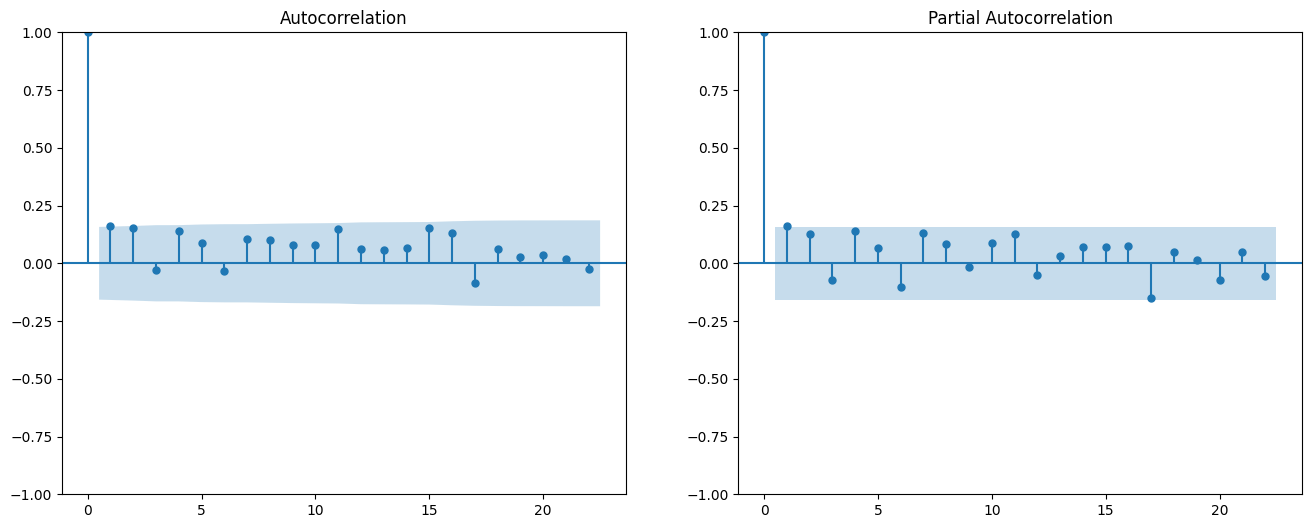

In [67]:
# 繪製 ACF 和 PACF 圖
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(y_train_test_diff, ax=ax[0])
plot_pacf(y_train_test_diff, ax=ax[1])
plt.show()

> ACF 圖（左圖）在滯後 1 處有一個明顯的峰值，然後逐漸減弱，這表明 MA 部分的滯後數 q 可能為 1。



> PACF 圖（右圖）也在滯後 1 處有一個明顯的峰值，然後逐漸減弱，這表明 AR 部分的滯後數 p 可能為 1。

In [22]:
from statsmodels.tsa.arima.model import ARIMA

# 訓練 ARIMA 模型
p = 1
d = 1
q = 1

model = ARIMA(y_train, order=(p, d, q))
model_fit = model.fit()

# 預測
forecast = model_fit.forecast(steps=10)
print(forecast)

156    163.778501
157    164.349802
158    164.904406
159    165.442799
160    165.965457
161    166.472838
162    166.965390
163    167.443546
164    167.907726
165    168.358339
Name: predicted_mean, dtype: float64


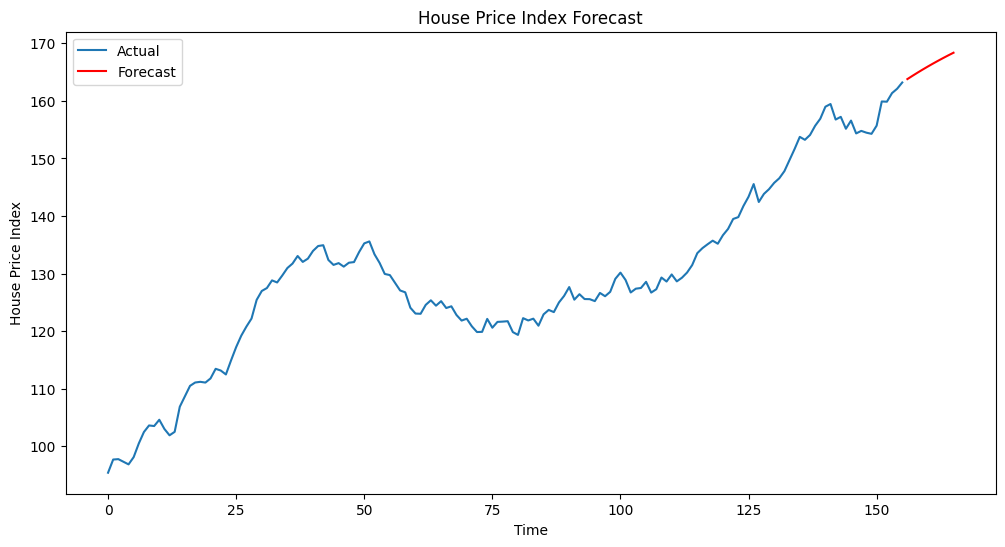

In [23]:
import matplotlib.pyplot as plt

# 繪製實際數據和預測數據
plt.figure(figsize=(12, 6))

# 原始訓練數據
plt.plot(y_train_test, label='Actual')

# 預測數據
forecast_index = range(len(y_train_test), len(y_train_test) + len(forecast))
plt.plot(forecast_index, forecast, label='Forecast', color='red')

plt.title('House Price Index Forecast')
plt.xlabel('Time')
plt.ylabel('House Price Index')
plt.legend()
plt.show()

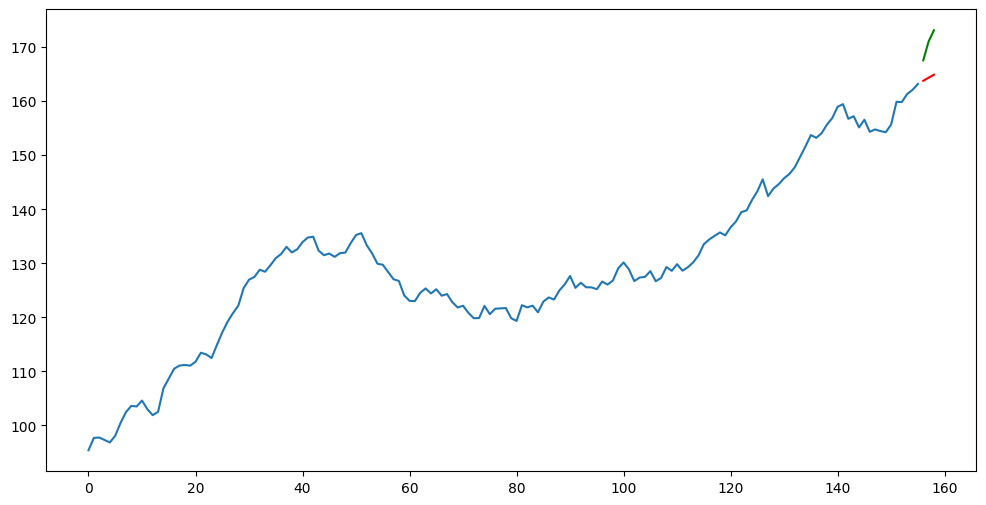

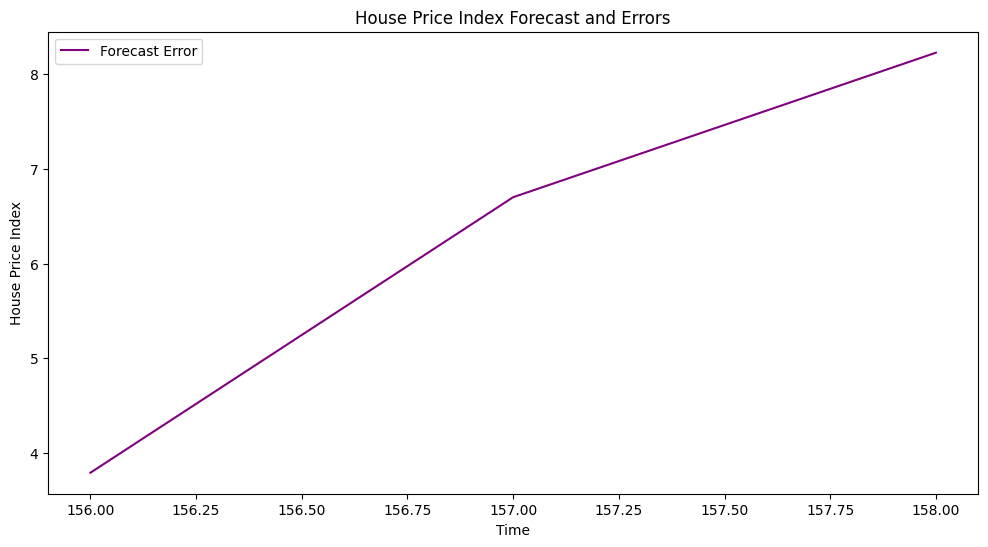

In [25]:
# 預測
forecast_steps = len(y_val)
forecast = model_fit.forecast(steps=forecast_steps)

# 計算誤差
forecast_error = y_val.values - forecast

# 繪製實際數據、預測數據和誤差
plt.figure(figsize=(12, 6))

# 原始訓練數據
plt.plot(y_train_test, label='Actual')

# 預測數據
forecast_index = range(len(y_train_test), len(y_train_test) + forecast_steps)
plt.plot(forecast_index, forecast, label='Forecast', color='red')

# 驗證集真實值
plt.plot(forecast_index, y_val.values, label='Validation Actual', color='green')

# 繪製誤差
plt.figure(figsize=(12, 6))
plt.plot(forecast_index, forecast_error, label='Forecast Error', color='purple')

plt.title('House Price Index Forecast and Errors')
plt.xlabel('Time')
plt.ylabel('House Price Index')
plt.legend()
plt.show()

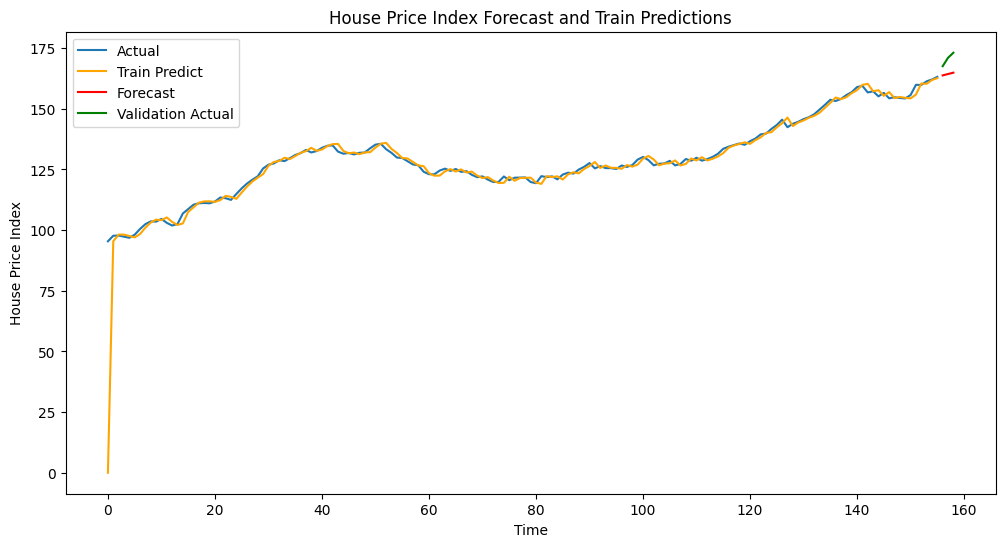

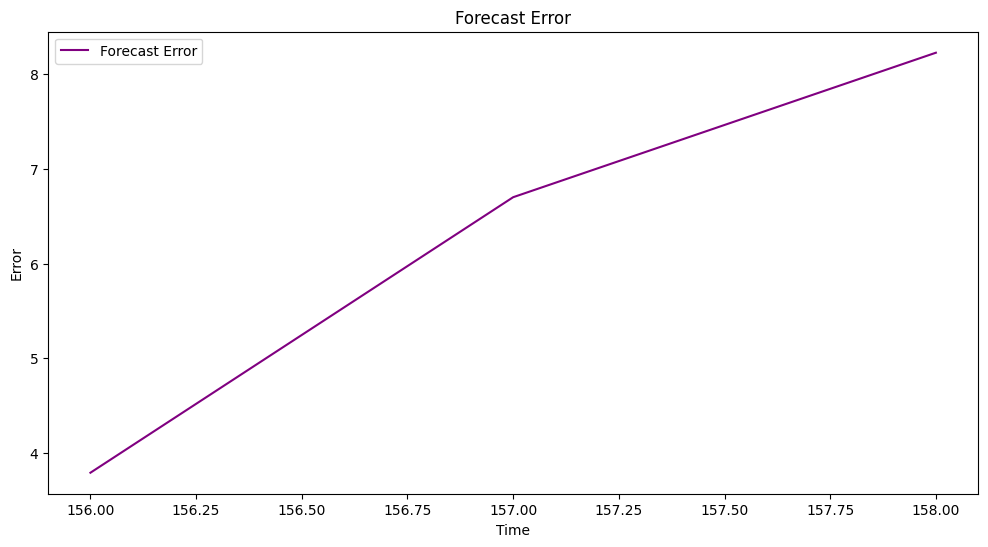

In [26]:
# 訓練集內的預測
train_pred = model_fit.predict(start=0, end=len(y_train_test)-1)

# 預測未來
forecast_steps = len(y_val)
forecast = model_fit.forecast(steps=forecast_steps)

# 計算誤差
forecast_error = y_val.values - forecast

# 繪製實際數據、訓練集預測數據、驗證集真實值和預測數據
plt.figure(figsize=(12, 6))

# 原始訓練數據
plt.plot(y_train_test, label='Actual')

# 訓練集預測數據
plt.plot(train_pred, label='Train Predict', color='orange')

# 預測數據
forecast_index = range(len(y_train_test), len(y_train_test) + forecast_steps)
plt.plot(forecast_index, forecast, label='Forecast', color='red')

# 驗證集真實值
plt.plot(forecast_index, y_val.values, label='Validation Actual', color='green')

plt.title('House Price Index Forecast and Train Predictions')
plt.xlabel('Time')
plt.ylabel('House Price Index')
plt.legend()
plt.show()

# 繪製誤差圖
plt.figure(figsize=(12, 6))
plt.plot(forecast_index, forecast_error, label='Forecast Error', color='purple')
plt.title('Forecast Error')
plt.xlabel('Time')
plt.ylabel('Error')
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

# 計算 MSE, RMSE, R^2
mse = mean_squared_error(y_val, forecast)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, forecast)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

MSE: 42.30950386806254
RMSE: 6.504575610142643
R^2: -7.04186521787698


In [32]:
Actual_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/detailed_usage_for_xgboost.csv')

In [34]:
Actual_data.info(max)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696193 entries, 0 to 696192
Data columns (total 133 columns):
 #    Column                                Dtype  
---   ------                                -----  
 0    community_name                        int64  
 1    main_building_ratio                   float64
 2    building_age                          float64
 3    number_of_land                        int64  
 4    number_of_building                    int64  
 5    number_of_parking_space               int64  
 6    management_org_available              int64  
 7    total_area_ping                       float64
 8    total_floors                          float64
 9    target_floor                          float64
 10   transaction_floors                    float64
 11   bedrooms                              float64
 12   living_rooms                          float64
 13   bathrooms                             float64
 14   year_month_for_combine                object 
 15 